In [2]:
import pandas as pd
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
import keras

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import os

import math


from tensorflow.keras.utils import Sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import datetime as dt

import warnings
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # turn off deprecation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# BTC

# BTC

# BTC

## Prepare Data


In [4]:
df = pd.read_csv('../../../data/latest_hour_final_btc.csv')

In [5]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,close_time,qav,num_trades,...,macd,macd_diff,macd_signal,mi,sma,wma,stc,vi_pos,vi_neg,DATE
0,719,1612065600000,33930.22,34127.65,33794.27,34034.31,1805.951751,1612069199999,6.133822e+07,47859,...,693.576433,-123.229722,816.806155,119.130127,34337.592667,33157.939951,10.546399,0.974031,1.069934,2021-01-31
1,720,1612069200000,34034.30,34056.64,33678.46,33756.39,1919.906624,1612072799999,6.492941e+07,63877,...,662.246125,-135.240026,797.486151,118.863344,34362.174333,33157.859207,6.054186,0.998732,1.034352,2021-01-31
2,721,1612072800000,33757.17,33857.88,33571.42,33655.86,1945.825594,1612076399999,6.560021e+07,47790,...,627.891213,-148.395571,776.286784,118.577742,34379.210667,33157.253797,3.027093,0.961298,1.060364,2021-01-31
3,722,1612076400000,33655.85,33846.27,33450.00,33607.98,2065.004715,1612079999999,6.951583e+07,52990,...,593.316761,-160.098770,753.415531,118.316717,34396.598500,33156.420928,1.513547,0.970220,1.067847,2021-01-31
4,723,1612080000000,33607.68,33832.94,33312.12,33596.72,2711.806898,1612083599999,9.111258e+07,62435,...,560.334490,-168.945911,729.280401,118.143109,34413.577833,33155.571335,0.756773,0.977007,1.038749,2021-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,20234,1682348400000,27430.19,27431.78,27200.00,27267.05,2847.378610,1682351999999,7.772804e+07,70232,...,-474.551189,27.985206,-502.536395,119.348508,27529.856667,28835.759663,66.967173,0.935692,1.048629,2023-04-24
19426,20235,1682352000000,27267.06,27394.52,27028.64,27110.55,3676.588450,1682355599999,1.001164e+08,77477,...,-486.683663,13.871140,-500.554803,119.543406,27525.899333,28823.916077,33.483587,0.927045,1.039898,2023-04-24
19427,20236,1682355600000,27110.56,27409.46,26942.82,27381.49,4336.614960,1682359199999,1.180799e+08,85391,...,-484.325154,14.200943,-498.526097,119.860643,27525.630333,28813.585796,16.741793,0.913650,1.036474,2023-04-24
19428,20237,1682359200000,27381.48,27579.80,27290.00,27339.90,2879.101490,1682362799999,7.893014e+07,59206,...,-483.634588,13.030071,-496.664659,120.168855,27525.520333,28803.035029,19.081760,0.955280,1.023216,2023-04-24


In [6]:

df.drop(columns=['Unnamed: 0','datetime','DATE'], inplace=True)
df

,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,...,ichimoku_conversion_line,macd,macd_diff,macd_signal,mi,sma,wma,stc,vi_pos,vi_neg
0,33930.22,34127.65,33794.27,34034.31,1805.951751,1612069199999,6.133822e+07,47859,901.536633,3.062264e+07,...,34227.500,693.576433,-123.229722,816.806155,119.130127,34337.592667,33157.939951,10.546399,0.974031,1.069934
1,34034.30,34056.64,33678.46,33756.39,1919.906624,1612072799999,6.492941e+07,63877,901.740718,3.049552e+07,...,34227.500,662.246125,-135.240026,797.486151,118.863344,34362.174333,33157.859207,6.054186,0.998732,1.034352
2,33757.17,33857.88,33571.42,33655.86,1945.825594,1612076399999,6.560021e+07,47790,930.326020,3.136616e+07,...,34185.710,627.891213,-148.395571,776.286784,118.577742,34379.210667,33157.253797,3.027093,0.961298,1.060364
3,33655.85,33846.27,33450.00,33607.98,2065.004715,1612079999999,6.951583e+07,52990,986.383474,3.321818e+07,...,34001.755,593.316761,-160.098770,753.415531,118.316717,34396.598500,33156.420928,1.513547,0.970220,1.067847
4,33607.68,33832.94,33312.12,33596.72,2711.806898,1612083599999,9.111258e+07,62435,1392.430165,4.679997e+07,...,33827.405,560.334490,-168.945911,729.280401,118.143109,34413.577833,33155.571335,0.756773,0.977007,1.038749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,27430.19,27431.78,27200.00,27267.05,2847.378610,1682351999999,7.772804e+07,70232,1311.273820,3.579657e+07,...,27438.855,-474.551189,27.985206,-502.536395,119.348508,27529.856667,28835.759663,66.967173,0.935692,1.048629
19426,27267.06,27394.52,27028.64,27110.55,3676.588450,1682355599999,1.001164e+08,77477,1883.274790,5.128798e+07,...,27374.605,-486.683663,13.871140,-500.554803,119.543406,27525.899333,28823.916077,33.483587,0.927045,1.039898
19427,27110.56,27409.46,26942.82,27381.49,4336.614960,1682359199999,1.180799e+08,85391,2041.306600,5.559569e+07,...,27331.695,-484.325154,14.200943,-498.526097,119.860643,27525.630333,28813.585796,16.741793,0.913650,1.036474
19428,27381.48,27579.80,27290.00,27339.90,2879.101490,1682362799999,7.893014e+07,59206,1370.207210,3.755738e+07,...,27331.695,-483.634588,13.030071,-496.664659,120.168855,27525.520333,28803.035029,19.081760,0.955280,1.023216


In [7]:
scaler = MinMaxScaler()


# Fit the scaler on your dataframe (let's say it's called df)
df_normalized = scaler.fit_transform(df)

# Convert the normalized data back to a dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

In [8]:

# Convert the DataFrame to a NumPy array
raw_data = df_normalized.values
close = df_normalized['close'].values
close = close.reshape((len(close),1))
# Display the NumPy array
print(type(raw_data))
print(raw_data.shape)
print(close.shape)

<class 'numpy.ndarray'>
(19430, 72)
(19430, 1)


## Prepare Model

In [9]:
print('Prep Data')
num_train_samples = int(0.6 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)


Prep Data
num_train_samples: 11658
num_val_samples: 4857
num_test_samples: 2915


In [11]:
# Set Parameters

# delay: time in future that will be predicted
delay = 12


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 1

# sequence length: sequence lenght of each sample
half_day = 1
sequence_length = 4 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

The timeseries will consist of batches containing 32 sequences of 96 samples.
Finally our target is 12 timesteps in the future, and will have data from 96 timesteps in the past


In [12]:
train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

Done Train
Done Validation
Done Test


## Build and Train Model

In [13]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs)


outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=30,
                    validation_data=val_dataset,
                    callbacks=callbacks)


Epoch 1/30


2023-04-24 14:20:57.481645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:20:57.483429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:20:57.484763: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0485

2023-04-24 14:21:09.642296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [4857,72]
	 [[{{node Placeholder/_0}}]]
2023-04-24 14:21:09.642829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-04-24 14:21:09.977086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype in

362/362 [==============================] - 18s 44ms/step - loss: 0.0048 - mae: 0.0485 - val_loss: 0.0109 - val_mae: 0.0973
Epoch 2/30
362/362 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0329

2023-04-24 14:21:27.342966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:21:27.345032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:21:27.346524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 15s 42ms/step - loss: 0.0018 - mae: 0.0329 - val_loss: 0.0067 - val_mae: 0.0731
Epoch 3/30
361/362 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0304

2023-04-24 14:21:42.842701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:21:42.844687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:21:42.846166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 16s 44ms/step - loss: 0.0016 - mae: 0.0304 - val_loss: 0.0044 - val_mae: 0.0569
Epoch 4/30
361/362 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0287

2023-04-24 14:21:58.693314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:21:58.695337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:21:58.696730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 15s 42ms/step - loss: 0.0014 - mae: 0.0287 - val_loss: 0.0043 - val_mae: 0.0563
Epoch 5/30
361/362 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0270

2023-04-24 14:22:14.051044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:22:14.053137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:22:14.054599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 15s 43ms/step - loss: 0.0012 - mae: 0.0270 - val_loss: 0.0037 - val_mae: 0.0520
Epoch 6/30
362/362 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0258

2023-04-24 14:22:29.477773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:22:29.479838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:22:29.481321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 16s 44ms/step - loss: 0.0011 - mae: 0.0258 - val_loss: 0.0027 - val_mae: 0.0442
Epoch 7/30
362/362 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0244

2023-04-24 14:23:08.145483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:23:08.153985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:23:08.155475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 38s 106ms/step - loss: 0.0010 - mae: 0.0244 - val_loss: 0.0022 - val_mae: 0.0392
Epoch 8/30
362/362 [==============================] - ETA: 0s - loss: 9.2077e-04 - mae: 0.0233

2023-04-24 14:23:26.484946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:23:26.486840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:23:26.488428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 19s 51ms/step - loss: 9.2077e-04 - mae: 0.0233 - val_loss: 0.0018 - val_mae: 0.0353
Epoch 9/30
361/362 [============================>.] - ETA: 0s - loss: 8.6500e-04 - mae: 0.0225

2023-04-24 14:23:45.345103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:23:45.347251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:23:45.348716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 19s 53ms/step - loss: 8.6421e-04 - mae: 0.0225 - val_loss: 0.0016 - val_mae: 0.0333
Epoch 10/30
361/362 [============================>.] - ETA: 0s - loss: 8.2480e-04 - mae: 0.0220

2023-04-24 14:24:07.425868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:24:07.427695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:24:07.429094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 57ms/step - loss: 8.2406e-04 - mae: 0.0220 - val_loss: 0.0014 - val_mae: 0.0317
Epoch 11/30
362/362 [==============================] - ETA: 0s - loss: 7.9069e-04 - mae: 0.0215

2023-04-24 14:24:28.182549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:24:28.184455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:24:28.185956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 7.9069e-04 - mae: 0.0215 - val_loss: 0.0013 - val_mae: 0.0305
Epoch 12/30
362/362 [==============================] - ETA: 0s - loss: 7.6163e-04 - mae: 0.0211

2023-04-24 14:25:09.072136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:25:09.073945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:25:09.075477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 57ms/step - loss: 7.6163e-04 - mae: 0.0211 - val_loss: 0.0013 - val_mae: 0.0295
Epoch 13/30
361/362 [============================>.] - ETA: 0s - loss: 7.3619e-04 - mae: 0.0207

2023-04-24 14:25:29.318340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:25:29.320092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:25:29.321568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 56ms/step - loss: 7.3555e-04 - mae: 0.0207 - val_loss: 0.0012 - val_mae: 0.0286
Epoch 14/30
362/362 [==============================] - ETA: 0s - loss: 7.1013e-04 - mae: 0.0203

2023-04-24 14:25:49.914879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:25:49.918917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:25:49.920408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 7.1013e-04 - mae: 0.0203 - val_loss: 0.0012 - val_mae: 0.0280
Epoch 15/30
361/362 [============================>.] - ETA: 0s - loss: 6.8861e-04 - mae: 0.0200

2023-04-24 14:26:10.967858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:26:10.969775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:26:10.972382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 57ms/step - loss: 6.8803e-04 - mae: 0.0200 - val_loss: 0.0011 - val_mae: 0.0275
Epoch 16/30
362/362 [==============================] - ETA: 0s - loss: 6.6826e-04 - mae: 0.0197

2023-04-24 14:26:32.130457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:26:32.132259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:26:32.133758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 6.6826e-04 - mae: 0.0197 - val_loss: 0.0011 - val_mae: 0.0269
Epoch 17/30
362/362 [==============================] - ETA: 0s - loss: 6.4783e-04 - mae: 0.0193

2023-04-24 14:26:52.729100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:26:52.731931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:26:52.733575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 6.4783e-04 - mae: 0.0193 - val_loss: 0.0011 - val_mae: 0.0264
Epoch 18/30
361/362 [============================>.] - ETA: 0s - loss: 6.2812e-04 - mae: 0.0190

2023-04-24 14:27:13.871126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:27:13.873004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:27:13.874416: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 57ms/step - loss: 6.2761e-04 - mae: 0.0190 - val_loss: 0.0010 - val_mae: 0.0259
Epoch 19/30
361/362 [============================>.] - ETA: 0s - loss: 6.0891e-04 - mae: 0.0187

2023-04-24 14:27:34.367014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:27:34.368803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:27:34.370256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 6.0843e-04 - mae: 0.0187 - val_loss: 0.0010 - val_mae: 0.0256
Epoch 20/30
362/362 [==============================] - ETA: 0s - loss: 5.9071e-04 - mae: 0.0184

2023-04-24 14:27:55.378133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:27:55.379997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:27:55.381450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 5.9071e-04 - mae: 0.0184 - val_loss: 9.9688e-04 - val_mae: 0.0253
Epoch 21/30
361/362 [============================>.] - ETA: 0s - loss: 5.7472e-04 - mae: 0.0181

2023-04-24 14:28:16.324206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:28:16.326447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:28:16.327924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 5.7430e-04 - mae: 0.0181 - val_loss: 9.9179e-04 - val_mae: 0.0252
Epoch 22/30
361/362 [============================>.] - ETA: 0s - loss: 5.5922e-04 - mae: 0.0179

2023-04-24 14:28:37.224494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:28:37.226309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:28:37.227798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 59ms/step - loss: 5.5882e-04 - mae: 0.0179 - val_loss: 9.9142e-04 - val_mae: 0.0251
Epoch 23/30
362/362 [==============================] - 17s 46ms/step - loss: 5.4397e-04 - mae: 0.0176 - val_loss: 9.9372e-04 - val_mae: 0.0250
Epoch 24/30
362/362 [==============================] - 17s 48ms/step - loss: 5.2951e-04 - mae: 0.0174 - val_loss: 9.9680e-04 - val_mae: 0.0249
Epoch 25/30
362/362 [==============================] - 17s 48ms/step - loss: 5.1533e-04 - mae: 0.0171 - val_loss: 9.9858e-04 - val_mae: 0.0248
Epoch 26/30
362/362 [==============================] - 17s 47ms/step - loss: 5.0151e-04 - mae: 0.0169 - val_loss: 9.9662e-04 - val_mae: 0.0247
Epoch 27/30
361/362 [============================>.] - ETA: 0s - loss: 4.8897e-04 - mae: 0.0166

2023-04-24 14:30:26.398734: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:30:26.402127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:30:26.403625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 4.8868e-04 - mae: 0.0166 - val_loss: 9.8754e-04 - val_mae: 0.0245
Epoch 28/30
361/362 [============================>.] - ETA: 0s - loss: 4.7735e-04 - mae: 0.0164

2023-04-24 14:30:46.240344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:30:46.242099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:30:46.243641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 56ms/step - loss: 4.7708e-04 - mae: 0.0164 - val_loss: 9.7023e-04 - val_mae: 0.0242
Epoch 29/30
362/362 [==============================] - ETA: 0s - loss: 4.6614e-04 - mae: 0.0162

2023-04-24 14:31:03.887828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:31:03.889695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:31:03.891146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 17s 48ms/step - loss: 4.6614e-04 - mae: 0.0162 - val_loss: 9.4700e-04 - val_mae: 0.0239
Epoch 30/30
361/362 [============================>.] - ETA: 0s - loss: 4.5585e-04 - mae: 0.0160

2023-04-24 14:31:24.036054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:31:24.037977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:31:24.039483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 55ms/step - loss: 4.5562e-04 - mae: 0.0160 - val_loss: 9.1990e-04 - val_mae: 0.0235


In [14]:
# Save the trained model to a file
model.save('lstm_model_1.h5')

## Understanding the Model

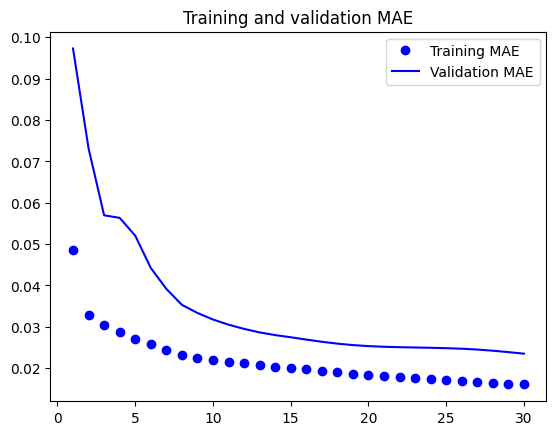

In [15]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## Looking at the data

In [16]:
pred_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=1,
                    sequence_stride=1,
                    sequence_length=180,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=32,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples
                    )




In [17]:


predictions = model.predict(pred_dataset)

2023-04-24 14:31:28.633010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-04-24 14:31:28.633612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


  1/147 [..............................] - ETA: 1:23

2023-04-24 14:31:29.003267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:31:29.005548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:31:29.007280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

147/147 [==============================] - 4s 21ms/step


In [18]:
len(close[num_train_samples+180:num_train_samples + num_val_samples+1])

4678

In [19]:
len(predictions)

4678

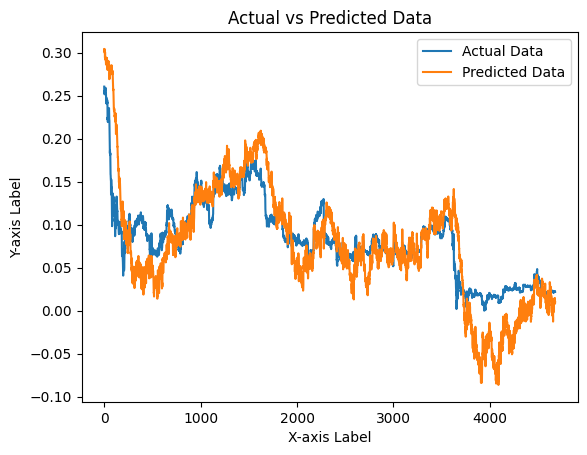

In [20]:
# Generate the predictions using your model and store it in a variable called 'predictions'

# Plot the actual data
plt.plot(range(len(predictions)), close[num_train_samples+180:num_train_samples + num_val_samples+1], label='Actual Data')

# Plot the predicted data
plt.plot(range(len(predictions)), predictions, label='Predicted Data')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs Predicted Data')
plt.legend()

# Display the plot
plt.show()

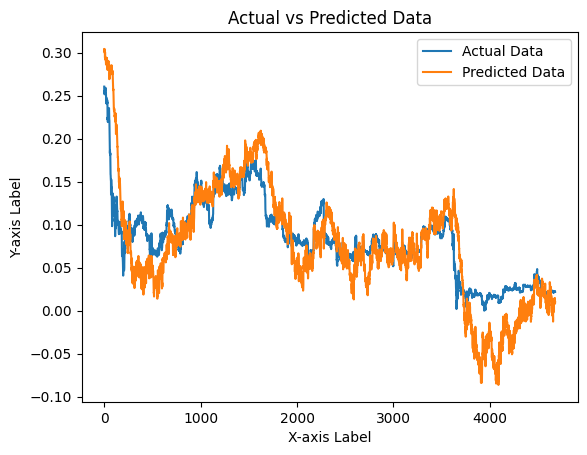

In [21]:
# Generate the predictions using your model and store it in a variable called 'predictions'


actual = close[num_train_samples+180:num_train_samples + num_val_samples+1]

# Plot the actual data
plt.plot(range(len(actual[0:24*5*60])), actual[0:24*5*60], label='Actual Data')

# Plot the predicted data
plt.plot(range(len(actual[0:24*5*60])), predictions[0:24*5*60], label='Predicted Data')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs Predicted Data')
plt.legend()

# Display the plot
plt.show()